# Analysis Notebook

In [111]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv('../data/country-data.csv')

In [ ]:
def style_df(df):
    """Style dataframe"""
    cell_hover = {
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    row_hover = {
        'selector': 'tr:hover',
        'props': [('background-color', '#ffffb3')]
    }
    
    numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64']).columns
    styler = df.style
    
    styler\
        .set_caption("INSERT CAPTION")\
        .background_gradient(axis="rows", cmap="Blues", subset=['child_mort', 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp'])\
        .set_table_styles([cell_hover, row_hover])\
        .format({
            "exports": "{:}%",
            "health": "{:}%",
            "imports": "{:}%",
            })\
        .highlight_max(color="red", subset=numeric_columns)\
        .highlight_min(color="lightgreen", subset=numeric_columns)\
        .bar(subset=["inflation"], align="zero", color=["red", "lightgreen"]) # bar chart
        #.highlight_quantile(q_left=0.25, q_right=0.75, subset="imports", color="red") # highlight quantiles
        #.highlight_between(left=70, right=80, subset="life_expec", color="yellow") # highlight range of values

    return styler

style_df(df)

# DBSCAN Clustering algorithm

In [107]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter

In [117]:
def DBSCAN_clustering(df: pd.DataFrame, eps: float):
    # determine epsilon with NearstNeighbors
    min_samples = df.shape[1]*2
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(df)
    neigh_dist, neigh_ind = nbrs.kneighbors(df)
    sort_neigh_dist = np.sort(neigh_dist, axis=0)
    
    k_dist = sort_neigh_dist[:, 4]
    plt.plot(k_dist)
    plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
    plt.ylabel("k-NN distance")
    plt.xlabel("Sorted observations (4th NN)")
    plt.show()
    
    clusters = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    labels = clusters.labels_
    print(set(labels)) # see unique labels
    print(labels) # -1 value represents noisy points could not assigned to any cluster
    
    print(Counter(labels))
    
    # Visualise clusters
    # p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
    # sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
    # plt.show()

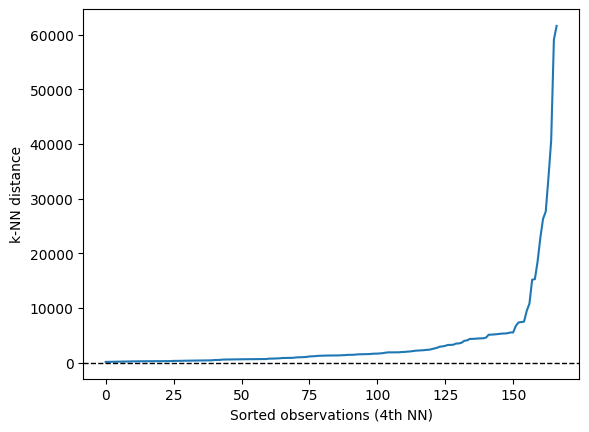

{0, -1}
[ 0  0  0  0  0  0  0 -1 -1  0 -1 -1  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0
  0 -1  0  0  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0  0
  0 -1 -1 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1 -1  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1 -1  0  0  0  0
 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0]
Counter({0: 128, -1: 39})


In [119]:
# only cluster on numeric columns
numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64'])

DBSCAN_clustering(numeric_columns, 7000)

#DBSCAN_clustering(df[['child_mort', 'health']], 4)